In [1]:
import open3d as o3d
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import time

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


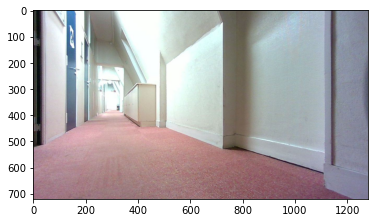

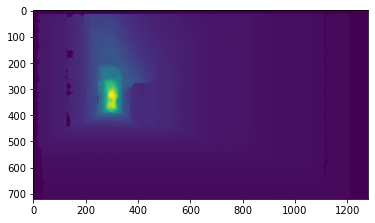

In [25]:
path = "3rd_Floor_Luxembourg/"
filename = "pointcloud_39.ply"
color_raw = o3d.io.read_image(path + "camera/camera_39.jpeg")
depth_raw = o3d.io.read_image(path + "depth_image/depth_39.png")
pcd = o3d.io.read_point_cloud(path + "PointClouds/" + filename)

plt.imshow(color_raw)
plt.show()
plt.imshow(depth_raw)
plt.show()

In [26]:
points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors)
points2 = []
colors2 = []
for i in range(len(points)):
    if points[i][1]<1.:
        points2.append(points[i])
        colors2.append(colors[i])
points2 = np.asarray(points2)    
colors2 = np.asarray(colors2)  
pcd.points = o3d.utility.Vector3dVector(points2)
pcd.colors = o3d.utility.Vector3dVector(colors2)

In [27]:
coord = np.asarray(pcd.points)
alpha = 0. #rad
R = np.array([[1., 0., 0.], [0., np.cos(alpha), -np.sin(alpha)], [0., np.sin(alpha), np.cos(alpha)]])
new_coord = R@coord.transpose()
new_coord = new_coord.transpose()

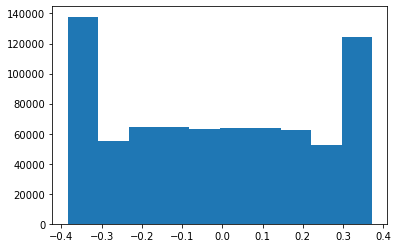

In [17]:
Y = np.asarray(new_coord)[:,1]
plt.hist(Y)
plt.show()

In [28]:
new_color = np.zeros(np.asarray(pcd.points).shape)
for i in range(len(np.asarray(pcd.points))):
    if new_coord[i][1]<-0.3:
        new_color[i] = [0.5, 0.5, 0.5]
    if new_coord[i][1]>1.:
        new_color[i] = [1., 1., 1.]

pcd.colors = o3d.utility.Vector3dVector(new_color)
#print(np.asarray(pcd.points))
#print(np.asarray(pcd.colors))

In [29]:
o3d.visualization.draw_geometries([pcd])

In [20]:
vis = o3d.visualization.Visualizer()
theta = np.pi/10 #rad
R1 = np.array([[np.cos(theta), 0., -np.sin(theta)], [0., 1., 0.], [np.sin(theta), 0., np.cos(theta)]])
R2 = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])

pcd.rotate(R1, center=(0, 0, 0))
pcd.rotate(R2, center=(0, 0, 0))
vis.create_window(visible=False) #works for me with False, on some systems needs to be true
vis.add_geometry(pcd)
vis.update_geometry(pcd)
vis.poll_events()
vis.update_renderer()
vis.capture_screen_image(path + "images/" + "image" + filename[10:-4] + ".png")
vis.destroy_window()

In [30]:
files = os.listdir(path + "PointClouds_gd/")
R = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False) #works for me with False, on some systems needs to be true

for filename in files:
    pcd = o3d.io.read_point_cloud(path + "PointClouds_gd/" + filename)
    pcd.rotate(R, center=(0, 0, 0))
    vis.add_geometry(pcd)
    vis.update_geometry(pcd)
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image(path + "images/" + "image" + filename[10:-4] + ".png")
    vis.clear_geometries()

vis.destroy_window()